In [ ]:
'''
7 gen W Donato Marc Luca Ferro Scalzo
7 gen W Donato Bond Luca Ferro Scalzo
7 gen L Bond Scalzo Ferro Luca Marc
8 gen L Donato Kate Ferro Luca Marc
8 gen W Kate Marc Ferro Luca Donato
8 gen W Ferro Luca Marc Kate Donato
10 gen L Vitto Scalzo Luca Donato Kate
10 gen W Luca Donato Kate Vitto Scalzo
10 gen W Vitto Donato Kate Luca Scalzo
10 gen W Scalzo Kate Vitto Donato Luca
10 gen L Kate Luca Scalzo Vitto Donato
13 gen W Luca Scalzo Marc Massi Vitto
13 gen L Bond Vitto Marc Massi Scalzo
13 gen Lm Scalzo Bond Vitto Luca Massi
13 gen W Marc Vitto Scalzo Bond Massi
15 gen L Bond Ferro Vitto Donato Marc
15 gen W Marc Vitto Ferro Donato Bond
15 gen L Vitto Ferro Donato Marc Bond
17 gen W Donato Kate Ferro Vitto Scalzo
17 gen L Kate Vitto Marc Ferro Scalzo
17 gen L Ferro Vitto Marc Donato Kate
20 gen W Vitto Scalzo Marc Bond Luca
21 gen W Luca Donato Marc Ferro Kate
21 gen L Ferro Donato Marc Luca Kate
22 gen L Kate Luca Donato Bond Scalzo
22 gen W Donato Luca Marc Vitto Kate
22 gen W Bond Kate Marc Luca Scalzo
22 gen W Kate Marc Donato Luca Bond
23 gen W Donato Scalzo Ferro Marc Vitto
23 gen W Scalzo Marc Donato Ferro Vitto
24 gen L Luca Massi Marc Kate Ric
24 gen W Luca Massi Marc Kate Ric
24 gen L Donato Luca Marc Vitto Bond
24 gen L Luca Ferro Marc Vitto Bond
27 gen W Massi Scalzo Luca Vitto Mike
27 gen W Vitto Luca Marc Bond Mike
'''

'\n7 gen W Donato Marc Luca Ferro Scalzo\n7 gen W Donato Bond Luca Ferro Scalzo\n7 gen L Bond Scalzo Ferro Luca Marc\n8 gen L Donato Kate Ferro Luca Marc\n8 gen W Kate Marc Ferro Luca Donato\n8 gen W Ferro Luca Marc Kate Donato\n10 gen L Vitto Scalzo Luca Donato Kate\n10 gen W Luca Donato Kate Vitto Scalzo\n10 gen W Vitto Donato Kate Luca Scalzo\n10 gen W Scalzo Kate Vitto Donato Luca\n10 gen L Kate Luca Scalzo Vitto Donato\n13 gen W Luca Scalzo Marc Massi Vitto\n13 gen L Bond Vitto Marc Massi Scalzo\n13 gen Lm Scalzo Bond Vitto Luca Massi\n13 gen W Marc Vitto Scalzo Bond Massi\n15 gen L Bond Ferro Vitto Donato Marc\n15 gen W Marc Vitto Ferro Donato Bond\n15 gen L Vitto Ferro Donato Marc Bond\n17 gen W Donato Kate Ferro Vitto Scalzo\n17 gen L Kate Vitto Marc Ferro Scalzo\n17 gen L Ferro Vitto Marc Donato Kate\n20 gen W Vitto Scalzo Marc Bond Luca\n21 gen W Luca Donato Marc Ferro Kate\n21 gen L Ferro Donato Marc Luca Kate\n22 gen L Kate Luca Donato Bond Scalzo\n22 gen W Donato Luca Marc

In [ ]:
# Per ordinare un dizionario
#from collections import OrderedDict

def parse_partite(raw_data) -> list:
    partite = []
    for riga in raw_data.strip().split("\n"):
        elementi = riga.split()
        data = f"{elementi[0]} {elementi[1]}"  # Combina giorno e mese
        risultato = elementi[2]  # Risultato (W, L, Wm, Lm)
        giocatori = elementi[3:]  # Lista di giocatori
        partite.append((data, risultato, giocatori))
    return partite

def conta_presenze(partite):
    presenze = {} # = {'p1': 35, 'p2': 29,...}
    elenco_giocatori_ordine_alfabetico = list()
    for partita in partite:
        giocatori = partita[2]
        for giocatore in giocatori:
            if giocatore not in elenco_giocatori_ordine_alfabetico:
                elenco_giocatori_ordine_alfabetico.append(giocatore)
                elenco_giocatori_ordine_alfabetico.sort()
    for giocatore in elenco_giocatori_ordine_alfabetico:
        presenze[giocatore] = 0
        for partita in partite:
            giocatori = partita[2]
            if giocatore in giocatori:
                presenze[giocatore] += 1
    presenze = dict(sorted(presenze.items(), key=lambda item: item[1], reverse=True))
    return elenco_giocatori_ordine_alfabetico, presenze

def calcola_classifica(partite):
    # Dizionario per i punteggi dei giocatori
    punteggi = {}

    # Calcolo dei punteggi
    for data, risultato, giocatori in partite:
        if risultato == "W":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "L":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 2  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 1  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4 # p1
            for p in giocatori[1:]:  # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 1
        elif risultato == "Lm":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4 # p1
            for p in giocatori[1:]: # p2, p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 1
        elif risultato == "Wv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) + 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) + 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) - 2
        elif risultato == "Lv":
            punteggi[giocatori[0]] = punteggi.get(giocatori[0], 0) - 4  # p1
            punteggi[giocatori[1]] = punteggi.get(giocatori[1], 0) - 2  # p2
            for p in giocatori[2:]:  # p3, p4, p5
                punteggi[p] = punteggi.get(p, 0) + 2
        else:
            print(f"Errore risultato non riconosciuto: {risultato}")
            #break

    # Ordinamento della classifica
    classifica = sorted(punteggi.items(), key=lambda x: x[1], reverse=True)
    return punteggi, classifica

def conta_punti_a_partita(punteggi, presenze):
    punti_a_partita = {}  # {'Donato': 0,26, 'Marc': 0,25, 'Luca': 0,19
    for giocatore in punteggi:
        punti_ = punteggi[giocatore]
        partite_giocate_ = presenze[giocatore]
        #print(punti_, "\t", partite_giocate_)
        punti_a_partita[giocatore] = round(punti_/partite_giocate_, 3)
        punti_a_partita = dict(sorted(punti_a_partita.items(), key=lambda item: item[1], reverse=True))
    return punti_a_partita

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Run
raw_data_ = [_][0]

# Parsing delle partite
partite = parse_partite(raw_data_)
#print(partite[5])  #('8 gen', 'W', ['Ferro', 'Luca', 'Marc', 'Kate', 'Donato'])
                    # str, char, list
                    # data, risultato, giocatori

# Calcolo della classifica
punteggi, classifica = calcola_classifica(partite)
#print(punteggi)          # {'Donato': 8, 'Marc': 11, 'Luca': 0, 'Ferro': -10,
#print(list(classifica))  # [('Marc', 11), ('Donato', 8), ('Luca
#print(classifica)        # [('Marc', 11), ('Donato', 8), ('Luca
#print(partite[9][2])     # ['Scalzo', 'Kate', 'Vitto', 'Donato', 'Luca']
                          # quindi giocatori_di_una_partita è partite[][2]

print("Classifica aggiornata al 27 gennaio 2025:")
for giocatore, punteggio in classifica:
    print(f"{giocatore}:\t {punteggio}")
# Calcolo presenze per giocatore
elenco_giocatori_ordine_alfabetico, presenze = conta_presenze(partite)
#print(elenco_giocatori_ordine_alfabetico)
print("\nPresenze:")
presenze = list(presenze.items()) # Perché presenze era un dict e adesso mi serve una list
for giocatore, presenze_giocatore in presenze:
    print(f"{giocatore}:\t{ presenze_giocatore} ({round(100*presenze_giocatore/(len(partite)),1)}%)")

print("\nPunti a partita")
presenze = dict(presenze) # Perché presenze era una list
punti_a_partita = conta_punti_a_partita(punteggi, presenze)
for giocatore, punti in punti_a_partita.items():
    print(f"{giocatore}:\t{punti}")

Classifica aggiornata al 27 gennaio 2025:
Marc:	 10
Donato:	 8
Massi:	 2
Luca:	 0
Ric:	 0
Scalzo:	 -1
Kate:	 -2
Vitto:	 -2
Mike:	 -2
Bond:	 -3
Ferro:	 -10

Presenze:
Luca:	26 (72.2%)
Marc:	26 (72.2%)
Donato:	23 (63.9%)
Vitto:	23 (63.9%)
Scalzo:	20 (55.6%)
Kate:	19 (52.8%)
Ferro:	17 (47.2%)
Bond:	15 (41.7%)
Massi:	7 (19.4%)
Mike:	2 (5.6%)
Ric:	2 (5.6%)

Punti a partita
Marc:	0.385
Donato:	0.348
Massi:	0.286
Luca:	0.0
Ric:	0.0
Scalzo:	-0.05
Vitto:	-0.087
Kate:	-0.105
Bond:	-0.2
Ferro:	-0.588
Mike:	-1.0


In [ ]:
#import matplotlib as mp
def calcola_punteggio_partita(giocatore, partita):
  # Calcolo del punteggio di un giocatore in ogni singola partita
  giocatori = partita[2]
  if giocatore not in giocatori:
    # Se il giocatore non ha giocato scrive 0
    return 0
  elif giocatore in giocatori:
    if partita[1] == "W":
      if giocatore == giocatori[0]:     # Se il giocatore è il giaguaro
        return 2
      elif giocatore == giocatori[1]:   # Se il giocatore è l'amico
        return 1
      elif giocatore in giocatori[2:]:
        return -1
    elif partita[1] == "L":
      if giocatore == giocatori[0]:
        return -2
      elif giocatore == giocatori[1]:
        return -1
      elif giocatore in giocatori[2:]:
        return 1
    elif partita[1] == "Wm":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore in giocatori[1:]:
        return -1
    elif partita[1] == "Lm":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore in giocatori[1:]:
        return 1
    elif partita[1] == "Wv":
      if giocatore == giocatori[0]:
        return 4
      elif giocatore == giocatori[1]:
        return 2
      elif giocatore in giocatori[2:]:
        return -2
    elif partita[1] == "Lv":
      if giocatore == giocatori[0]:
        return -4
      elif giocatore == giocatori[1]:
        return -2
      elif giocatore in giocatori[2:]:
        return 2
    else:
      print(f"Errore risultato non riconosciuto: {partita[1]}")
      #break()
      return -1000

def calcola_timeseries(elenco_giocatori_ordine_alfabetico, partite) -> dict:
  timeseries = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    risultati_giocatore = []
    for partita in partite:
      risultati_giocatore.append(calcola_punteggio_partita(giocatore, partita))
    timeseries[giocatore] = risultati_giocatore
  return timeseries

for giocatore in elenco_giocatori_ordine_alfabetico:
  punteggio = 0
  for partita in partite[:22]:
    punteggio += calcola_punteggio_partita(giocatore, partita)
  print(f"{giocatore}:\t{punteggio}")

print('\n',elenco_giocatori_ordine_alfabetico)
for partita in partite[:3]:
  lista_risultati = []
  for giocatore in elenco_giocatori_ordine_alfabetico:
    lista_risultati.append(calcola_punteggio_partita(giocatore, partita))
  print(lista_risultati)

print('')
timeseries = dict(calcola_timeseries(elenco_giocatori_ordine_alfabetico,partite[:7]))
for giocatore in timeseries:
   print(f"{giocatore}:\t{timeseries[giocatore]}")

Bond:	-6
Donato:	7
Ferro:	-4
Kate:	-2
Luca:	2
Marc:	10
Massi:	0
Mike:	0
Ric:	0
Scalzo:	-5
Vitto:	-2

 ['Bond', 'Donato', 'Ferro', 'Kate', 'Luca', 'Marc', 'Massi', 'Mike', 'Ric', 'Scalzo', 'Vitto']
[0, 2, -1, 0, -1, 1, 0, 0, 0, -1, 0]
[1, 2, -1, 0, -1, 0, 0, 0, 0, -1, 0]
[-2, 0, 1, 0, 1, 1, 0, 0, 0, -1, 0]

Bond:	[0, 1, -2, 0, 0, 0, 0]
Donato:	[2, 2, 0, -2, -1, -1, 1]
Ferro:	[-1, -1, 1, 1, -1, 2, 0]
Kate:	[0, 0, 0, -1, 2, -1, 1]
Luca:	[-1, -1, 1, 1, -1, 1, 1]
Marc:	[1, 0, 1, 1, 1, -1, 0]
Massi:	[0, 0, 0, 0, 0, 0, 0]
Mike:	[0, 0, 0, 0, 0, 0, 0]
Ric:	[0, 0, 0, 0, 0, 0, 0]
Scalzo:	[-1, -1, -1, 0, 0, 0, -1]
Vitto:	[0, 0, 0, 0, 0, 0, -2]


In [ ]:
def calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico, partite) -> dict():
  incremento_punteggi = {}
  for giocatore in elenco_giocatori_ordine_alfabetico:
    incremento_punteggi[giocatore] = []
    count = 0
    for partita in partite:
       count += calcola_punteggio_partita(giocatore, partita)
       incremento_punteggi[giocatore].append(count)
  return incremento_punteggi

print('\n',elenco_giocatori_ordine_alfabetico)
incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite[:5]))
print(incremento_punteggi)


 ['Bond', 'Donato', 'Ferro', 'Kate', 'Luca', 'Marc', 'Massi', 'Mike', 'Ric', 'Scalzo', 'Vitto']
{'Bond': [0, 1, -1, -1, -1], 'Donato': [2, 4, 4, 2, 1], 'Ferro': [-1, -2, -1, 0, -1], 'Kate': [0, 0, 0, -1, 1], 'Luca': [-1, -2, -1, 0, -1], 'Marc': [1, 1, 2, 3, 4], 'Massi': [0, 0, 0, 0, 0], 'Mike': [0, 0, 0, 0, 0], 'Ric': [0, 0, 0, 0, 0], 'Scalzo': [-1, -2, -3, -3, -3], 'Vitto': [0, 0, 0, 0, 0]}


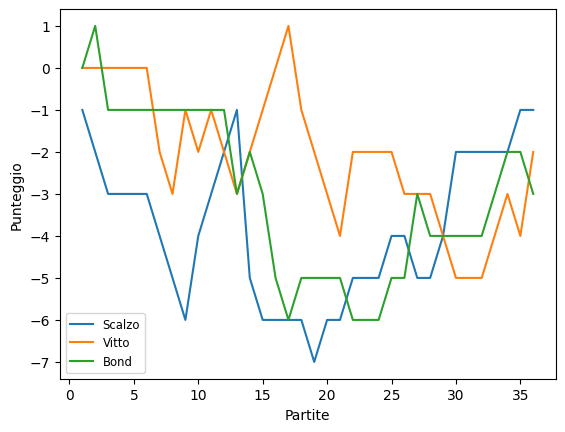

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def disegna(giocatore, partite):
  matches = (np.arange(1, len(partite)+1)).tolist()
  points = np.array(incremento_punteggi[giocatore])
  plt.xlabel('Partite')
  plt.ylabel('Punteggio')
  plt.plot(matches, points)

def disegna_multi(giocatori, partite):
  for giocatore in giocatori:
    disegna(giocatore, partite)
  plt.legend(giocatori, loc='lower left', fontsize='small')

incremento_punteggi = dict(calcola_incremento_punteggi(elenco_giocatori_ordine_alfabetico,partite))
tutti = elenco_giocatori_ordine_alfabetico

disegna_multi(['Scalzo','Vitto','Bond'], partite)
plt.show()